<a href="https://colab.research.google.com/github/smohammadhejazi/recommendation-as-a-service/blob/main/colab/kmodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation as a service: Working with Kmodes

## Install kmodes library

In [ ]:
!pip install kmodes

## Imort libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import time
import math
from kmodes.kmodes import KModes

## Load Movielens 100k 

### Download and unzip

In [ ]:
# Load datasets
data_dir = 'data'
!mkdir $data_dir
!cd $data_dir && wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
!cd $data_dir && unzip ml-100k.zip

mkdir: cannot create directory ‘data’: File exists
--2022-05-10 07:05:17--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.2’

ml-100k.zip.2       100%[===================>]   4.70M  5.47MB/s    in 0.9s    

2022-05-10 07:05:18 (5.47 MB/s) - ‘ml-100k.zip.2’ saved [4924029/4924029]

Archive:  ml-100k.zip
replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  in

In [ ]:
!ls $data_dir/ml-100k

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


### Reading users and users' ratings tables

In [ ]:
col_names=['user_id', 'item_id', 'rating', 'timestamp'] 
ratings = pd.read_csv(data_dir + '/ml-100k/u.data', sep='\t', names=col_names)
col_names=['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(data_dir + '/ml-100k/u.user', sep='|', names=col_names)

In [ ]:
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Droping zip_code to test for better results later

In [ ]:
users_clean = users.drop(columns='zip_code')

In [ ]:
users_clean.head(5)

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


## Applying kmodes on users

### Applying kmodes on original users table with [1, 120] number of clusters

In [ ]:
cost = []
fit_time = []
k_clusters = range(1,120)
for k in k_clusters:
  print('*** ' + str(k) + ' Clusters ***')
  kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=1)
  start = time.perf_counter()
  kmode.fit_predict(users)
  end = time.perf_counter()
  cost.append(kmode.cost_)
  fit_time.append(end - start)


*** 1 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3800.0
Best run was number 1
*** 2 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 3670.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 28, cost: 3523.0
Init: initializing centroids
Init: initial

### Applying kmodes on users table without zip_code with [1, 120] number of clusters

In [ ]:
cost_2 = []
fit_time_2 = []
k_clusters_2 = range(1,120)
for k in k_clusters_2:
  print('*** ' + str(k) + ' Clusters ***')
  kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=1)
  start = time.perf_counter()
  kmode.fit_predict(users_clean)
  end = time.perf_counter()
  cost_2.append(kmode.cost_)
  fit_time_2.append(end - start)


*** 1 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2866.0
Best run was number 1
*** 2 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 2730.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16, cost: 2607.0
Init: initializing centroids
Init: initiali

## Using elbow method to find best number of clusters

### On original users table

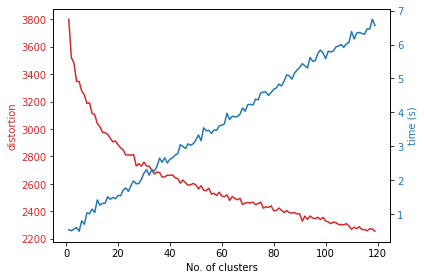

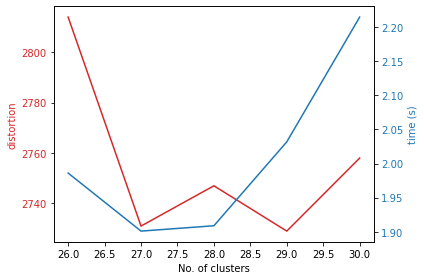

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters, cost, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters, fit_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters[25:30], cost[25:30], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters[25:30], fit_time[25:30], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

### On users table without zip_code

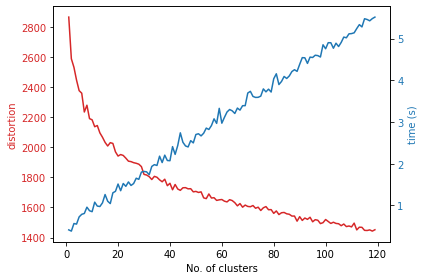

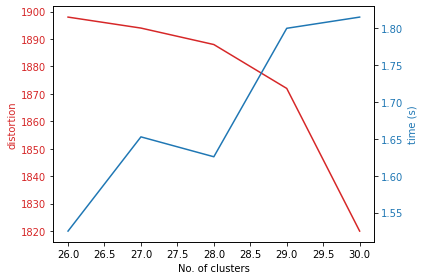

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters_2, cost_2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters_2, fit_time_2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters_2[25:30], cost_2[25:30], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters_2[25:30], fit_time_2[25:30], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

**Note:** There is no major difference, so we keep all the users table columns.

## Clustring with k = 30

In [ ]:
kmode = KModes(n_clusters=30, init="random", n_init=5, verbose=1)
clusters = kmode.fit_predict(users)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 126, cost: 2770.0
Run 1, iteration: 2/100, moves: 32, cost: 2770.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 99, cost: 2836.0
Run 2, iteration: 2/100, moves: 1, cost: 2836.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 200, cost: 2740.0
Run 3, iteration: 2/100, moves: 19, cost: 2739.0
Run 3, iteration: 3/100, moves: 0, cost: 2739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 225, cost: 2766.0
Run 4, iteration: 2/100, moves: 80, cost: 2758.0
Run 4, iteration: 3/100, moves: 1, cost: 2758.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 108, cost: 2769.0
Best run was number 3


In [ ]:
clustered_users = pd.DataFrame.copy(users)
clustered_users.insert(0, "cluster", clusters, True)

In [ ]:
clustered_users.head(5)

,cluster,user_id,age,gender,occupation,zip_code
0,20,1,24,M,technician,85711
1,11,2,53,F,other,94043
2,0,3,23,M,writer,32067
3,20,4,24,M,technician,43537
4,11,5,33,F,other,15213


## Defining a funcion to apply elbow method automatically 

### Function:

In [ ]:
def elbow_method(data):
  cost = []
  fit_time = []
  for k_clusters in range(1, int(math.sqrt(data.shape[0])) + 1):
    kmode = KModes(n_clusters=k_clusters, init="random", n_init=5, verbose=0)

    start = time.perf_counter()
    cluster_labels = kmode.fit_predict(data)
    end = time.perf_counter()

    cost.append(kmode.cost_)
    fit_time.append(end - start)

  np_cost = np.array([cost])
  np_fit_time = np.array([fit_time])
  cost_normalized = (np_cost - np.amin(np_cost)) / (np.amax(np_cost) - np.amin(np_cost))
  fit_time_normalized = (np_fit_time - np.amin(np_fit_time)) / (np.amax(np_fit_time) - np.amin(np_fit_time))

  for i in range(cost_normalized.size):
    if cost_normalized[0][i] <= fit_time_normalized[0][i]: 
      return i + 1, cost_normalized, fit_time_normalized, np_cost, np_fit_time
  return -1

### Test:

In [ ]:
optimal_n_cluster, cost_normalized, fit_time_normalized, np_cost, np_fit_time = elbow_method(users)

In [ ]:
print(optimal_n_cluster)

12


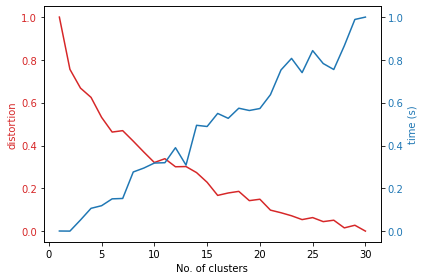

In [ ]:
k_clusters = range(1, int(math.sqrt(users.shape[0])) + 1)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters, cost_normalized[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters, fit_time_normalized[0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()